# Задача 2. Сравнение методов классификации
## Белокуров Андрей Витальевич, группа 22.М08-мм
### Выполненные и невыполненные задачи 
- [x] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [x] Взять данные для предсказания заболеваний сердца
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- [x] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- [ ] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [x] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- [x] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [x] * (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
- [x] * (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

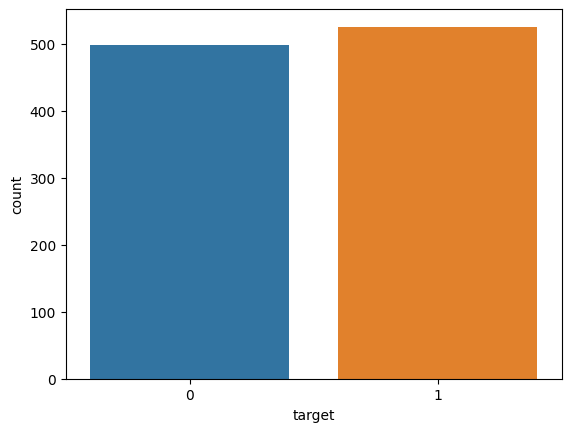

In [6]:
sns.countplot(data=df, x='target'); 

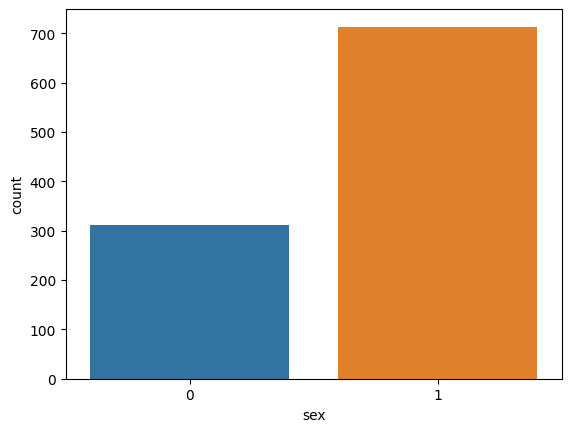

In [7]:
sns.countplot(data=df, x='sex'); 

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [9]:
df['target'].mean()

0.5132

In [10]:
df.groupby(['sex', 'target'])['target'].count()

sex  target
0    0          86
     1         226
1    0         413
     1         300
Name: target, dtype: int64

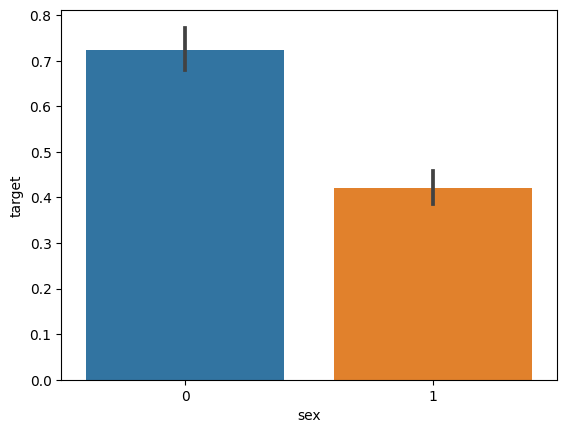

In [11]:
sns.barplot(x = "sex", y = "target", data = df); 

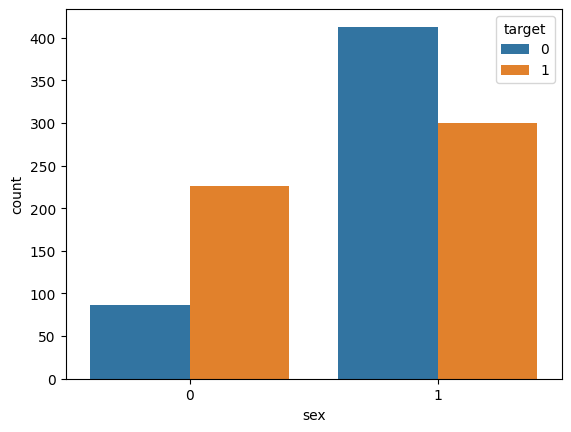

In [12]:
sns.countplot(x='sex',hue='target',data=df); 

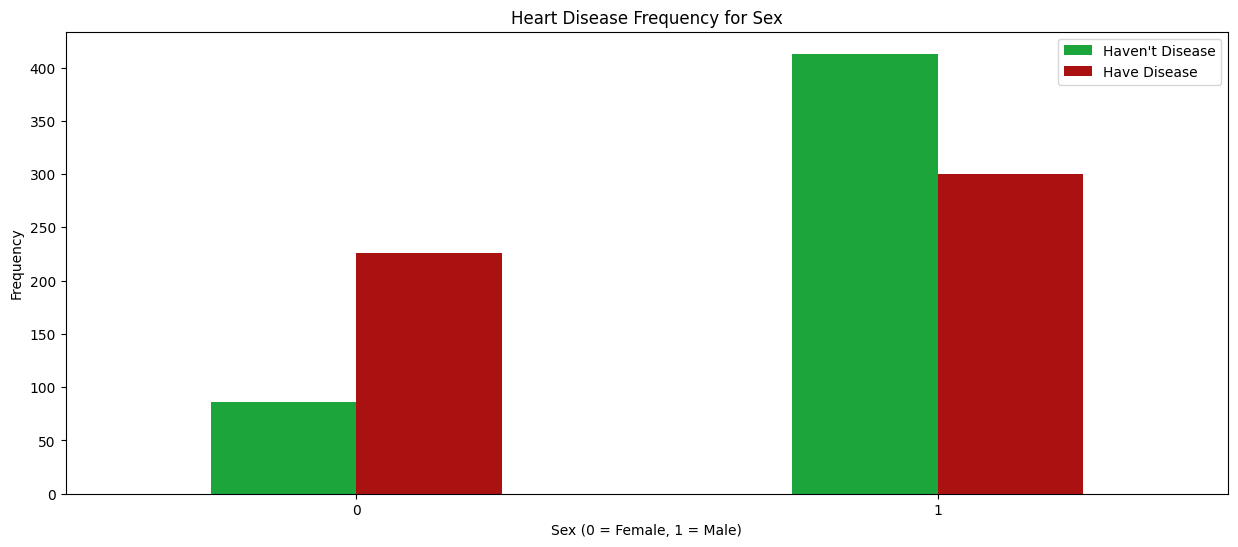

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

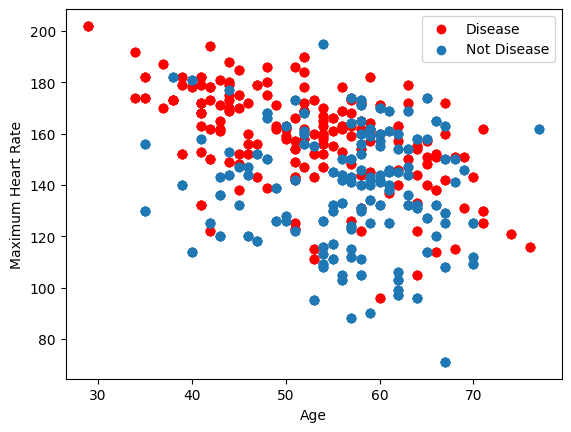

In [14]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

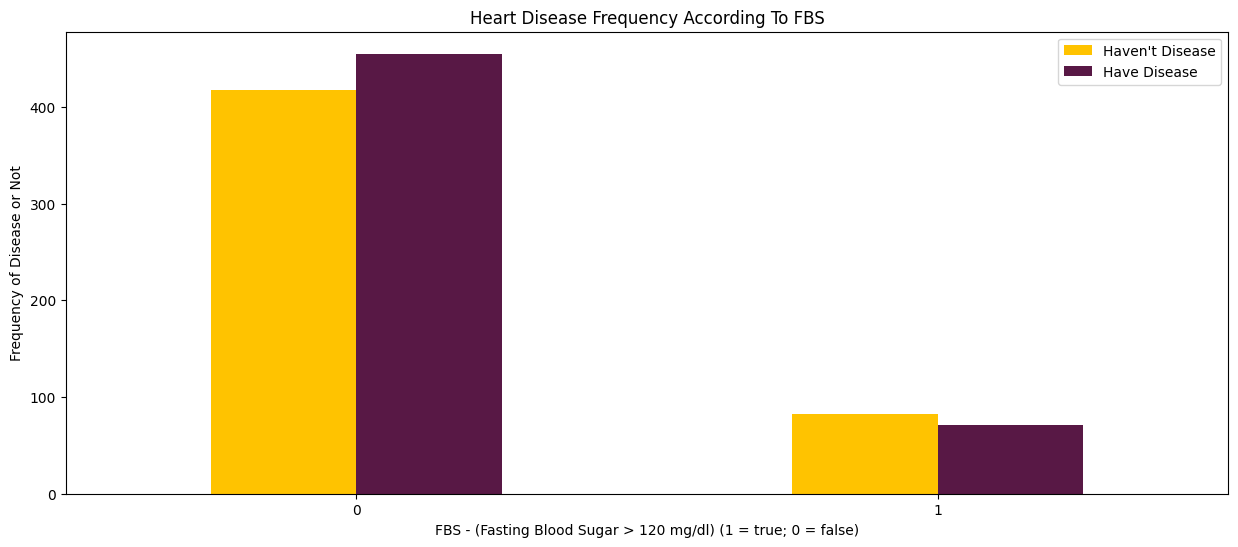

In [15]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [16]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

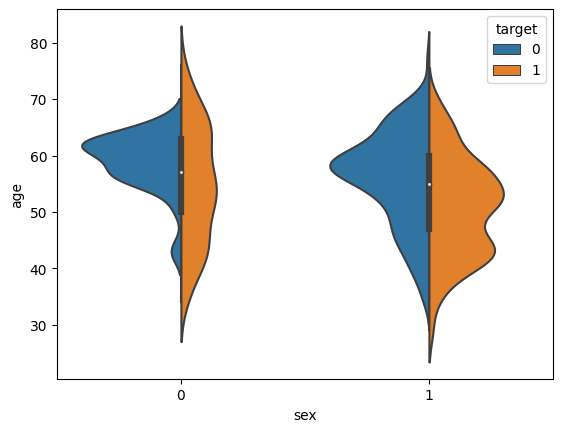

In [17]:
sns.violinplot(x ="sex", y="age", hue="target", data=df, split=True)
plt.show()

Преобразование

In [18]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [19]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8084


KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

3 NN Score: 0.9318


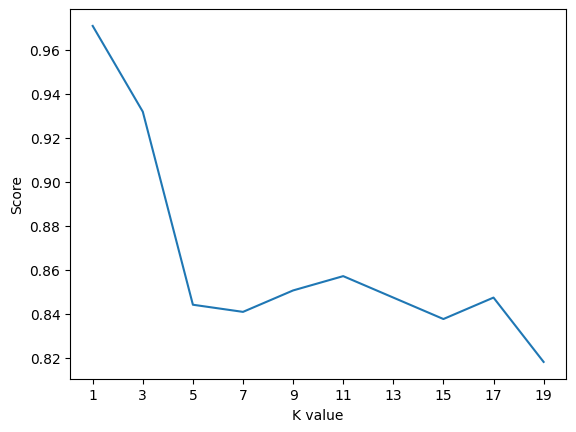

Maximum KNN Score is 0.9708


In [23]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

SVM

In [24]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.8961


Naive Bayes Algorithm

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.6688


Decision Tree Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9805


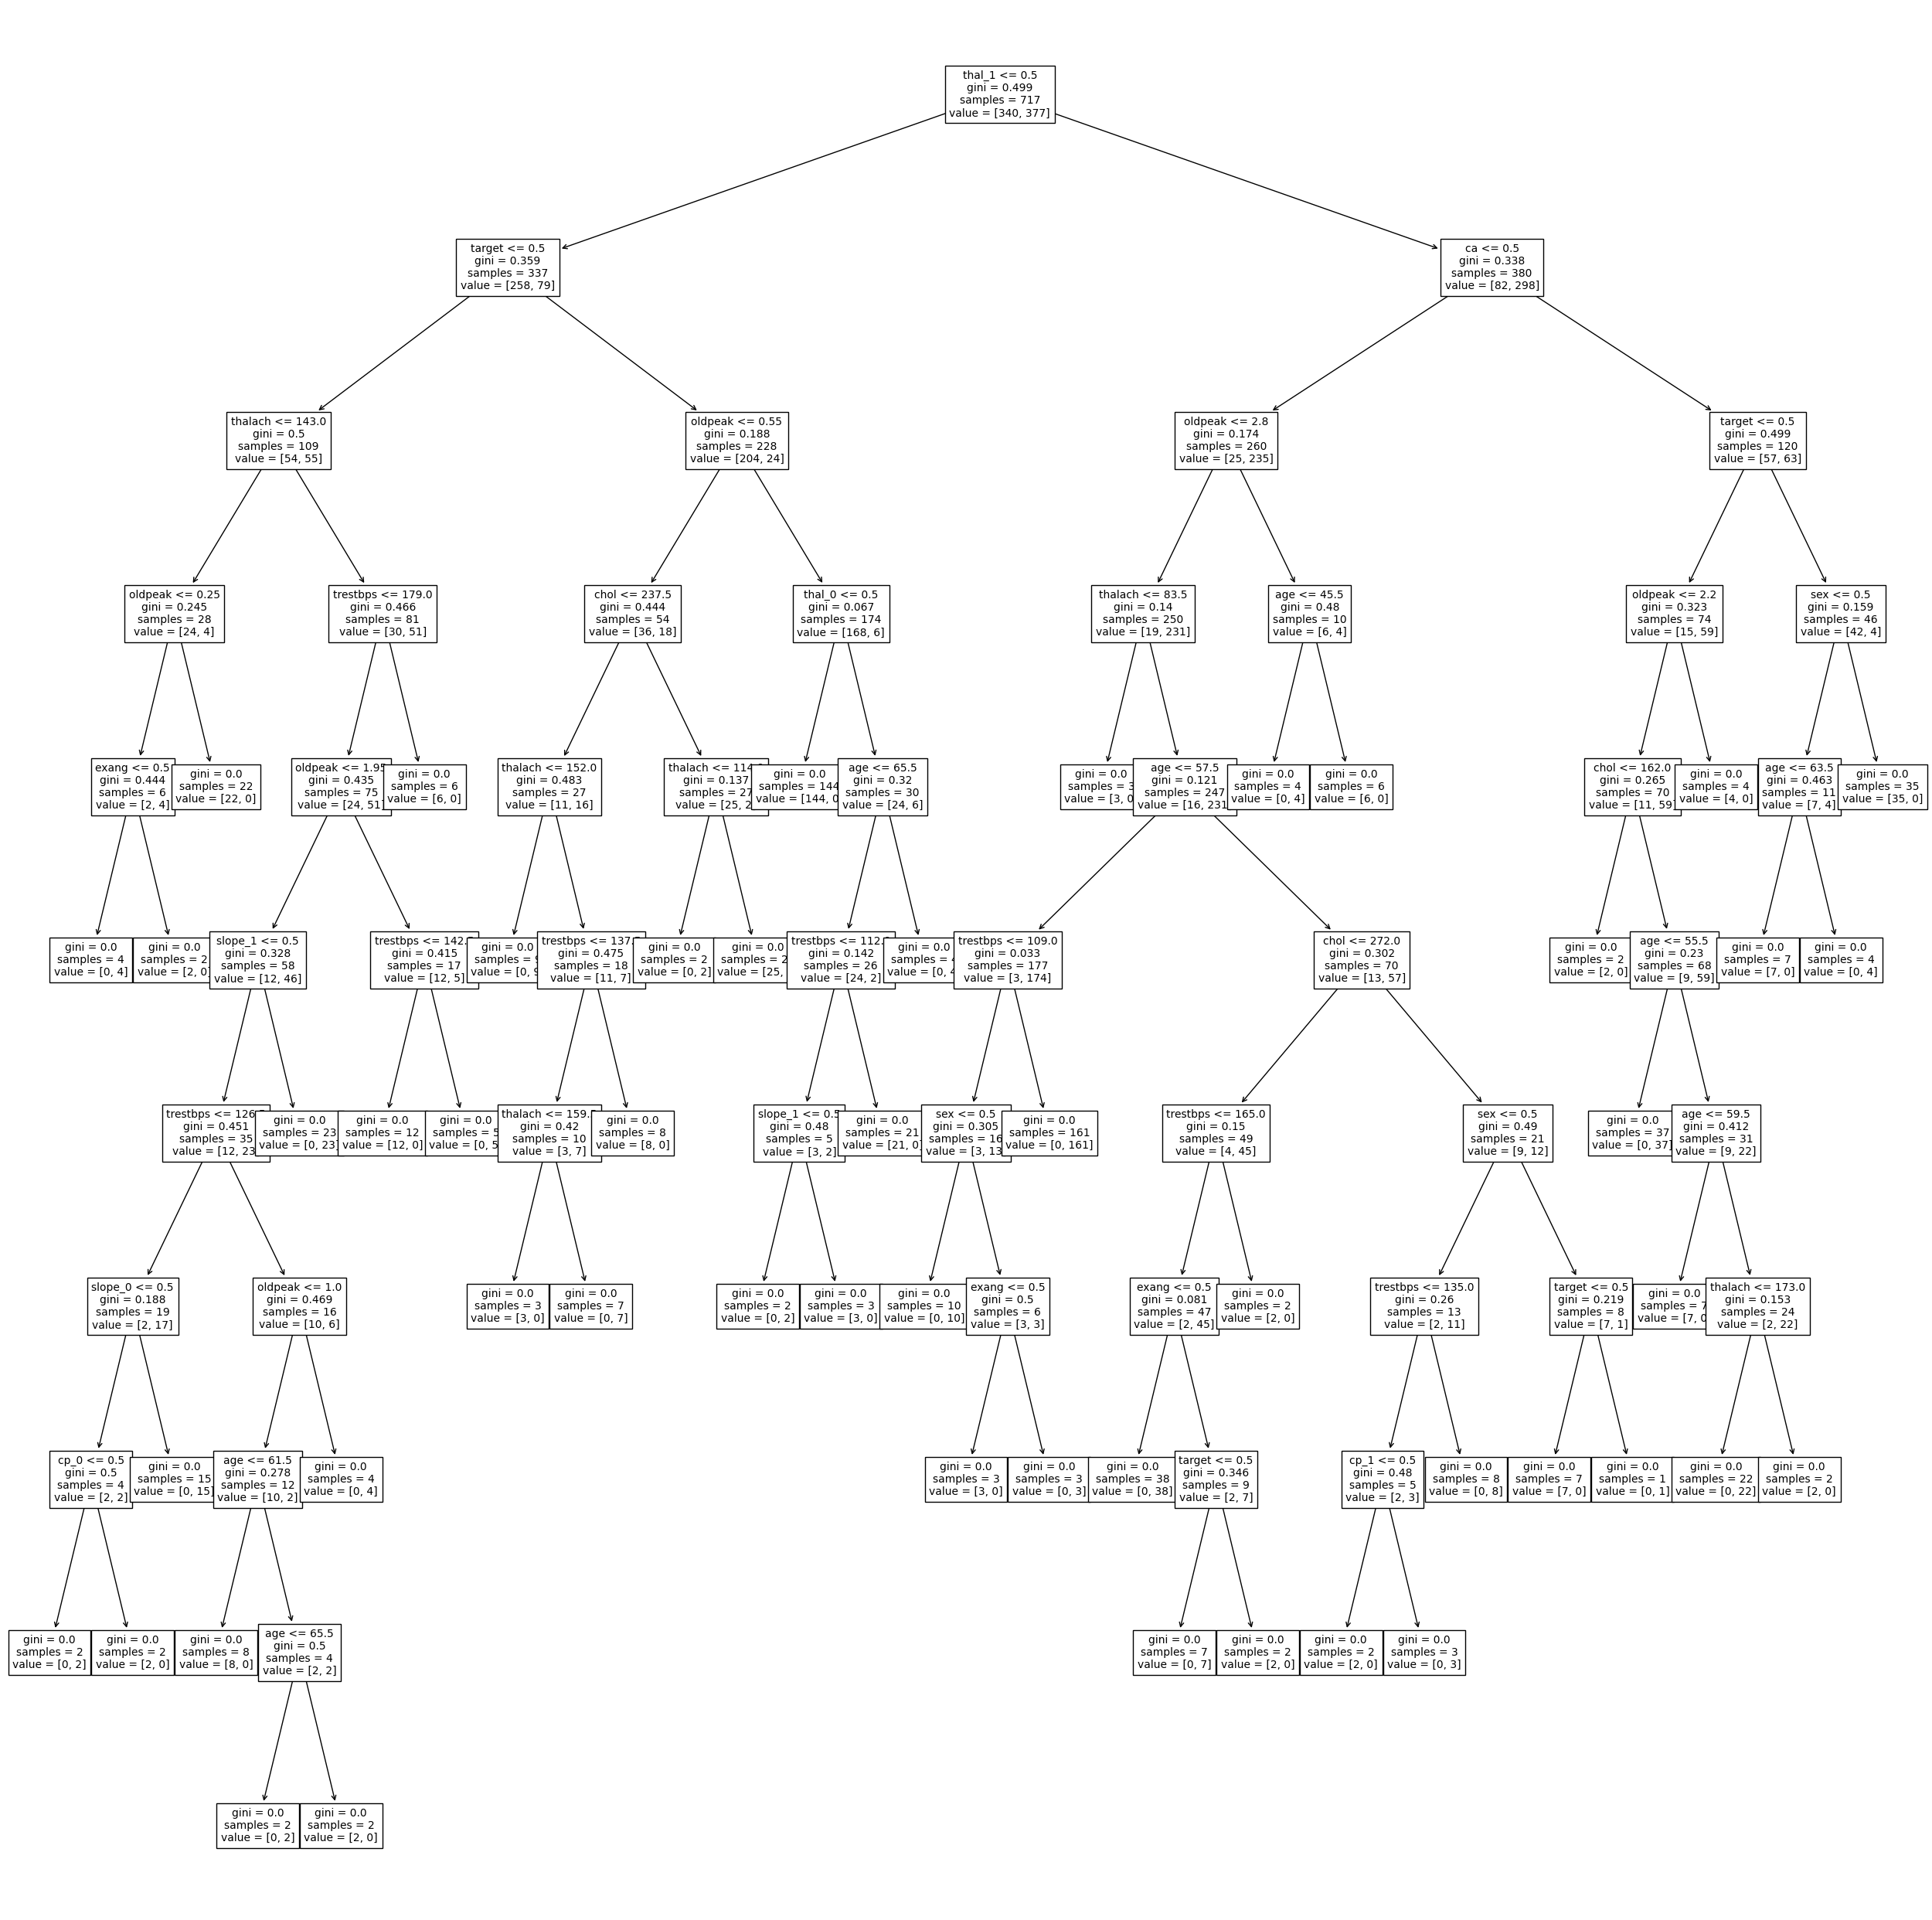

In [27]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

Custom LogGer

In [28]:
import copy
import numpy as np
from sklearn.metrics import accuracy_score

class CustomLogisticRegression(LogisticRegression):
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fit(self, x, y, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)

In [29]:
clr = CustomLogisticRegression()
clr.fit(X_train, y_train, epochs=150)
pred = clr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
accuracies['Custom LogReg'] = accuracy

0.6233766233766234


Custom KNN

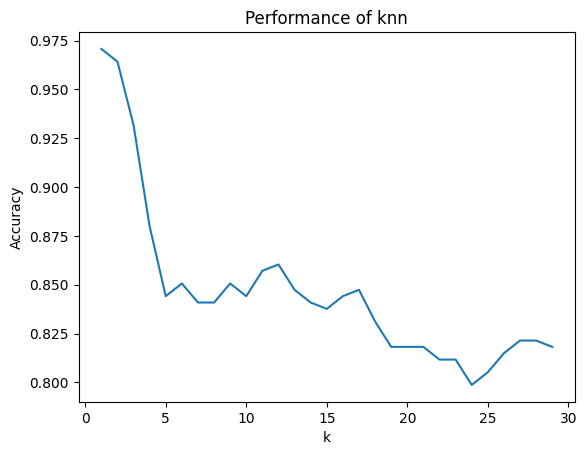

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))
class CustomKNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
# Unpack the iris dataset, from UCI Machine Learning Repository
# iris = datasets.load_iris()
# X = iris['data']
# y = iris['target']
# Split data into train & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
acc_knn = []
ks = range(1, 30)
for k in ks:
    cknn = CustomKNeighborsClassifier(k=k)
    cknn.fit(X_train, y_train)
    accuracy = cknn.evaluate(X_test, y_test)
    acc_knn.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, acc_knn)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [31]:
optimal_k=acc_knn.index(max(acc_knn))+1
optimal_k

1

In [32]:
cknn = CustomKNeighborsClassifier(optimal_k)
cknn.fit(X_train, y_train)
accuracy = cknn.evaluate(X_test, y_test)
accuracies['Custom KNN'] = accuracy

Сравнение

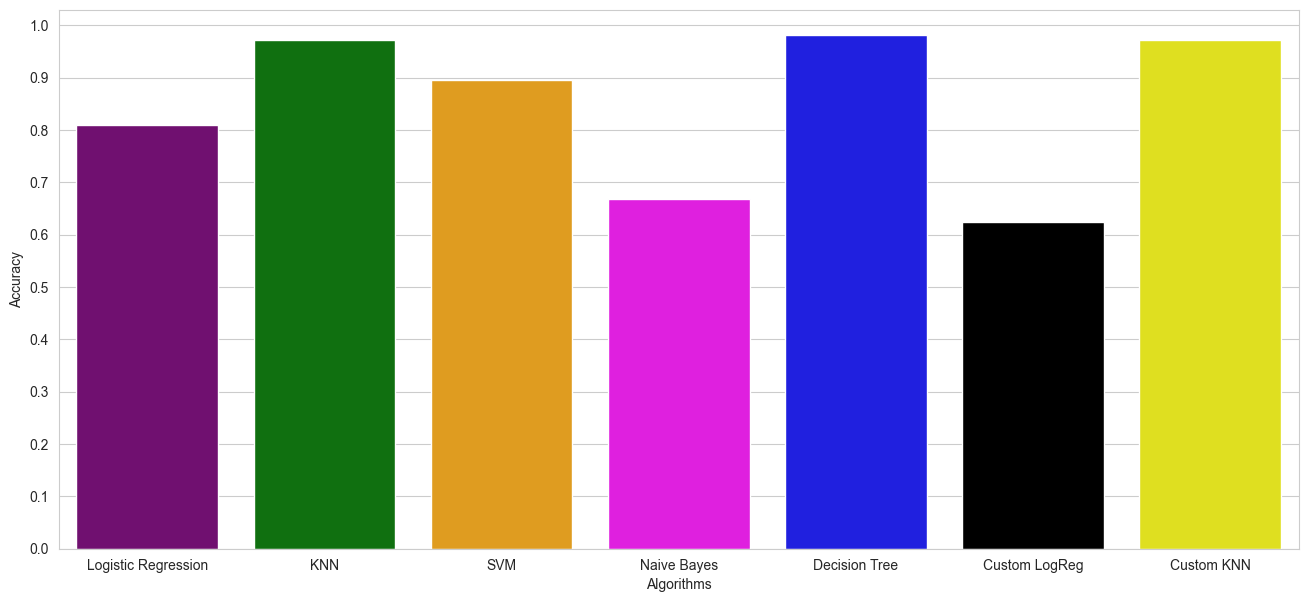

In [33]:
colors = ["purple", "green", "orange", "magenta", "blue", 'black', 'yellow']

sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Confusion matrix

In [34]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)
y_head_customlogreg = clr.predict(X_test)
y_head_customknn = cknn.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_clr = confusion_matrix(y_test, y_head_customlogreg)
cm_cknn = confusion_matrix(y_test, y_head_customknn)

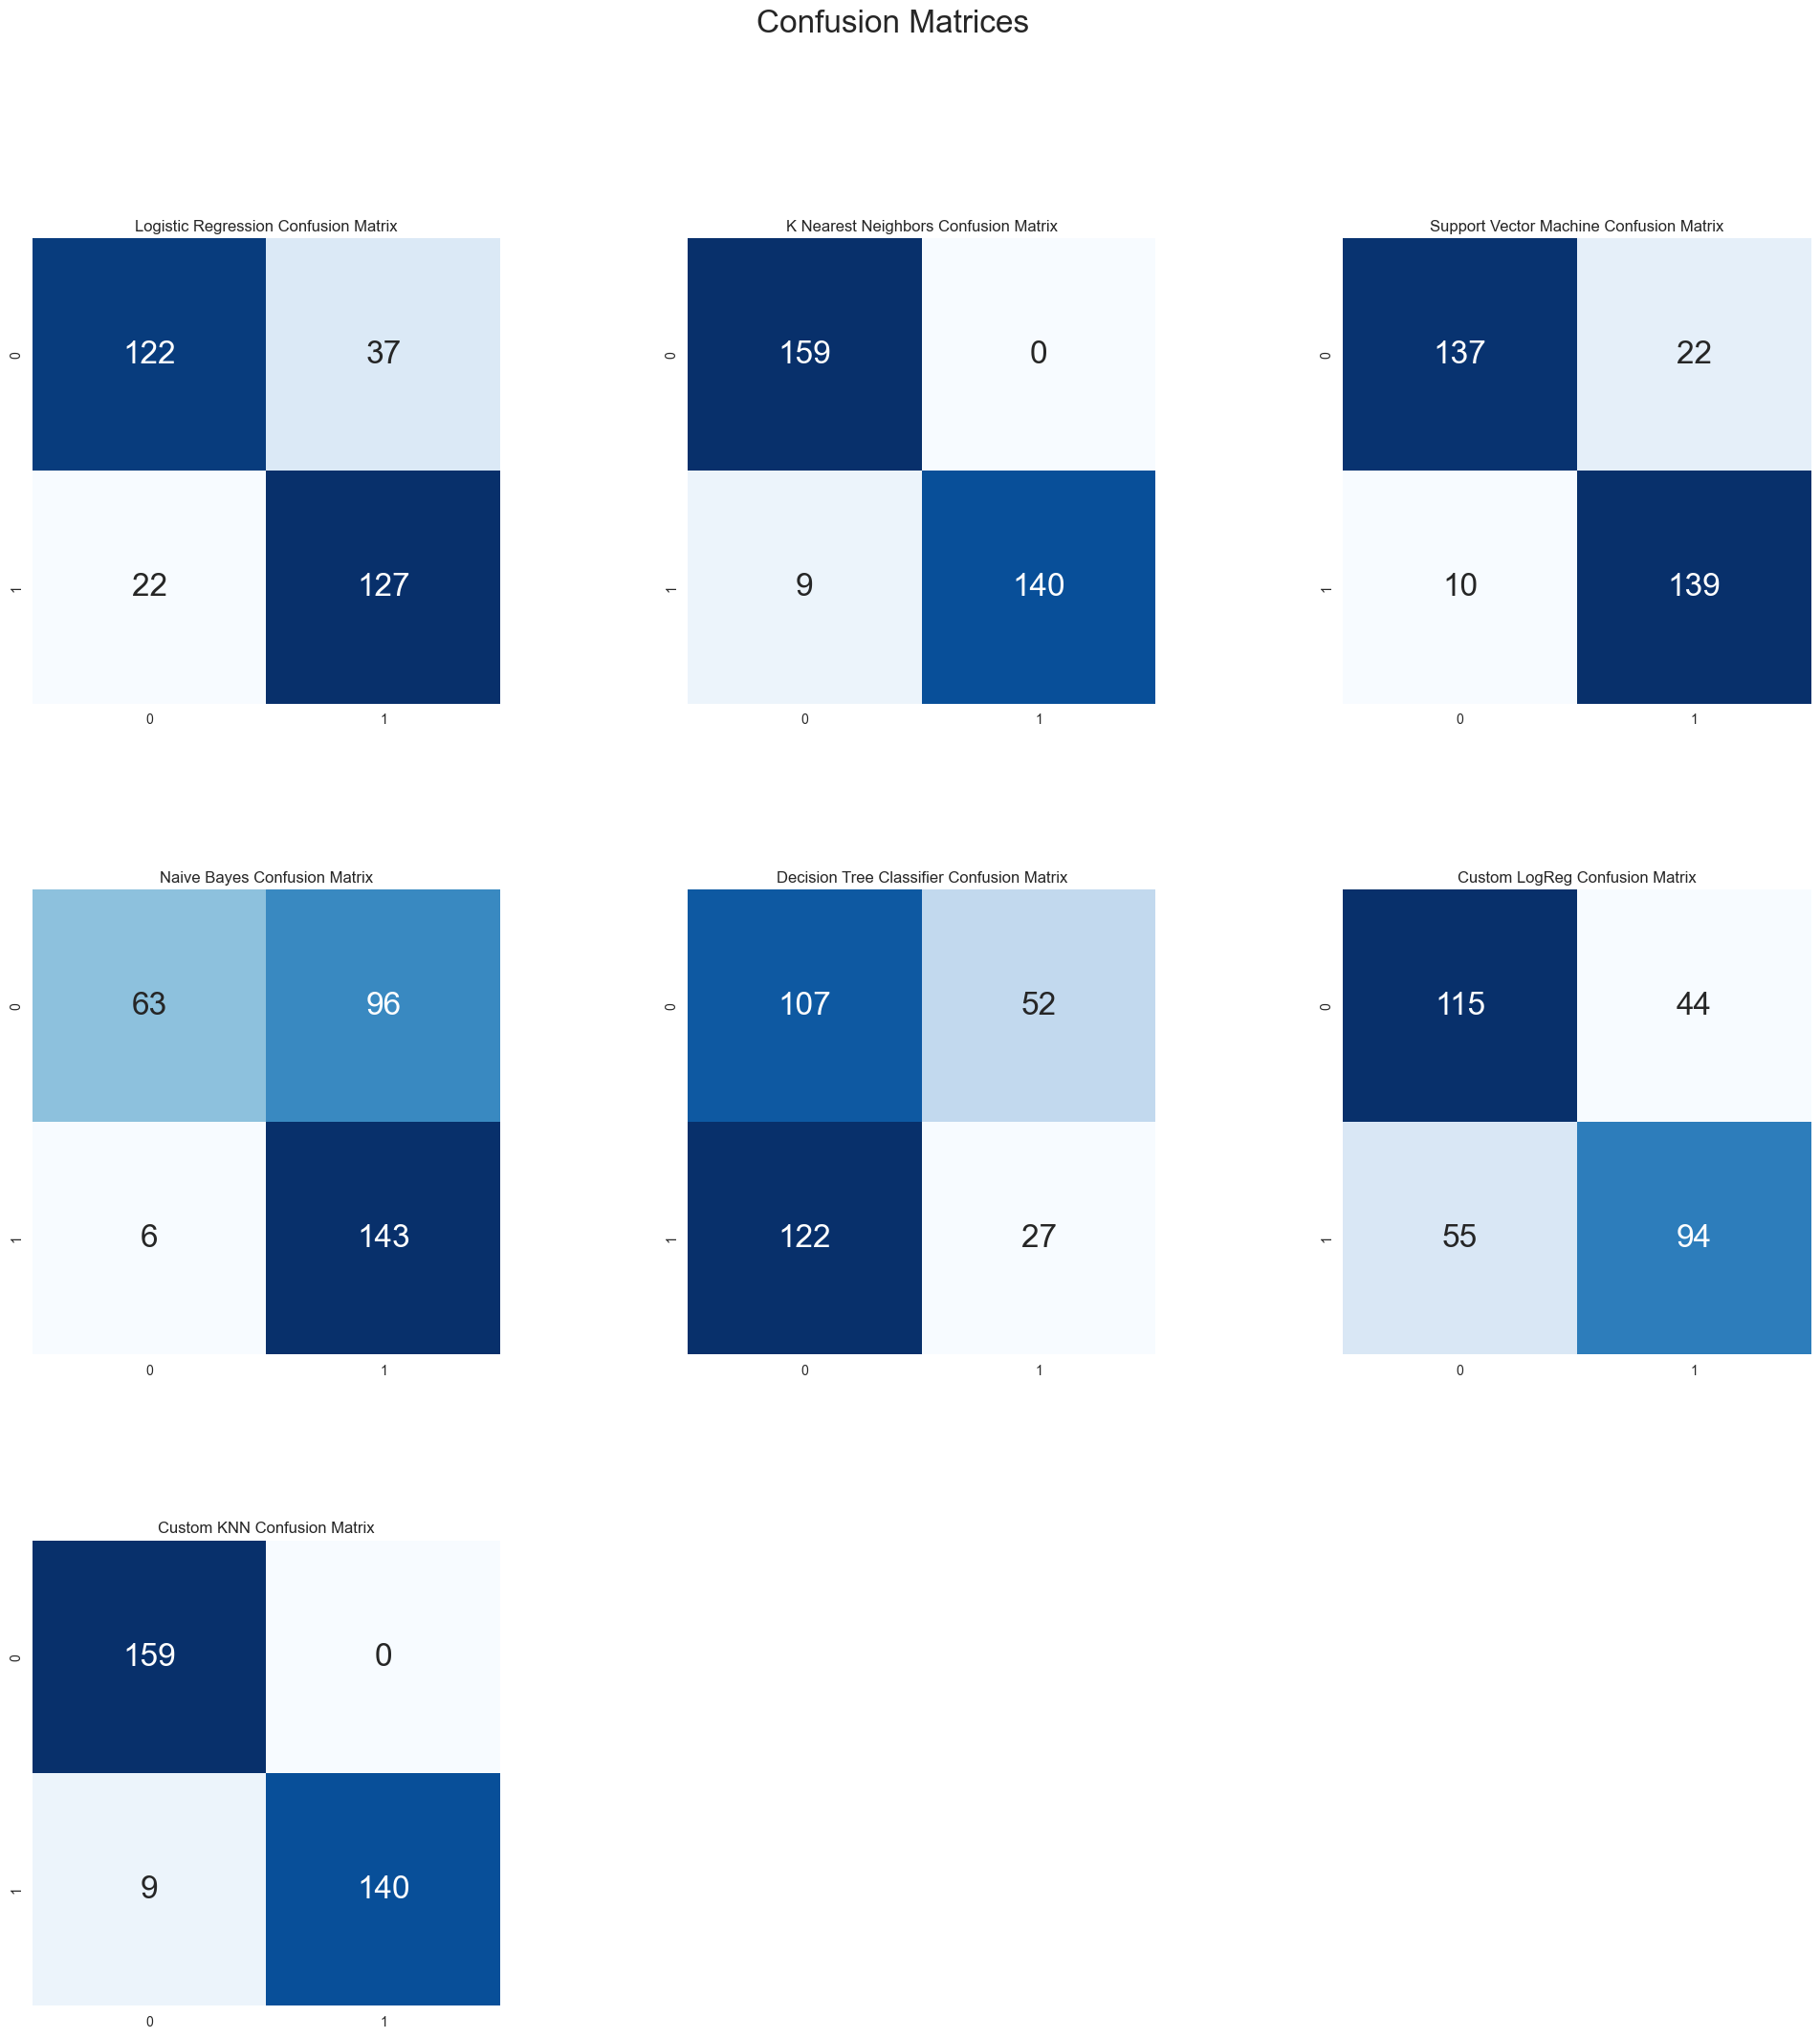

In [36]:
plt.figure(figsize=(24, 24))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Custom LogReg Confusion Matrix")
sns.heatmap(cm_clr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Custom KNN Confusion Matrix")
sns.heatmap(cm_cknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

Второй датасет

In [84]:
df = pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Описание датасета
- ID : index
- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status
- smoking (target)

In [85]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [86]:
df.smoking.value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

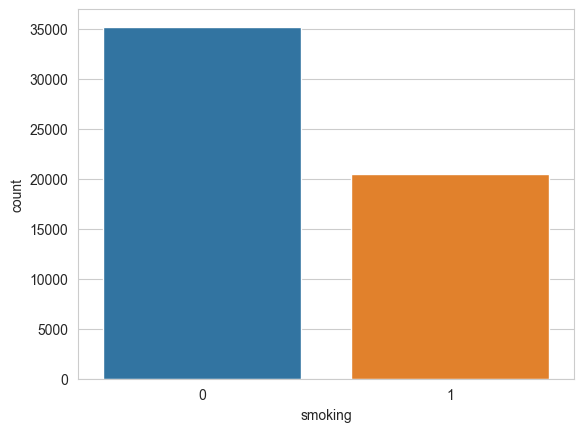

In [87]:
sns.countplot(x="smoking", data=df)
plt.show()

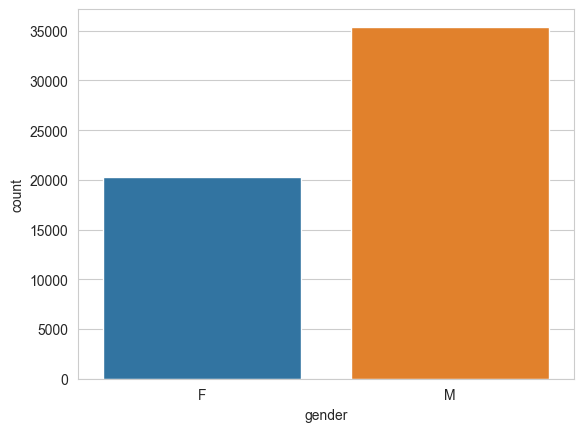

In [88]:
sns.countplot(data=df, x='gender'); 

In [89]:
df.groupby('smoking').mean()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
smoking,,,,,,,,,,,,,,,,,,,,,
0,27704.933422,45.677981,161.870477,62.907455,80.447669,0.989920,0.984110,1.028379,1.028436,120.732440,...,112.921957,59.294492,116.374549,14.144990,1.082811,0.849144,25.309135,24.740897,30.885859,0.180918
1,28087.648350,41.607431,169.436324,70.959668,84.800518,1.051733,1.047636,1.020777,1.022195,122.806502,...,150.341481,53.837888,112.535468,15.445339,1.094793,0.948775,27.688194,30.989782,55.570423,0.269176


In [90]:
df.groupby(['gender', 'smoking'])['smoking'].count()

gender  smoking
F       0          19432
        1            859
M       0          15805
        1          19596
Name: smoking, dtype: int64

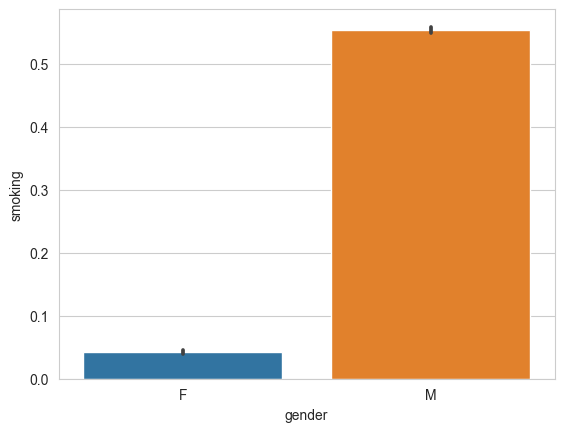

In [91]:
sns.barplot(x = "gender", y = "smoking", data = df); 

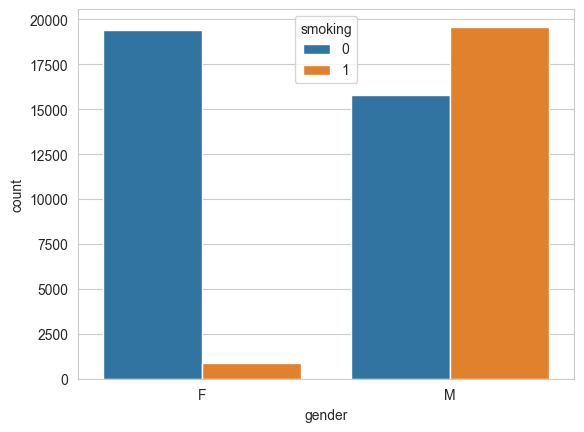

In [92]:
sns.countplot(x='gender',hue='smoking',data=df); 

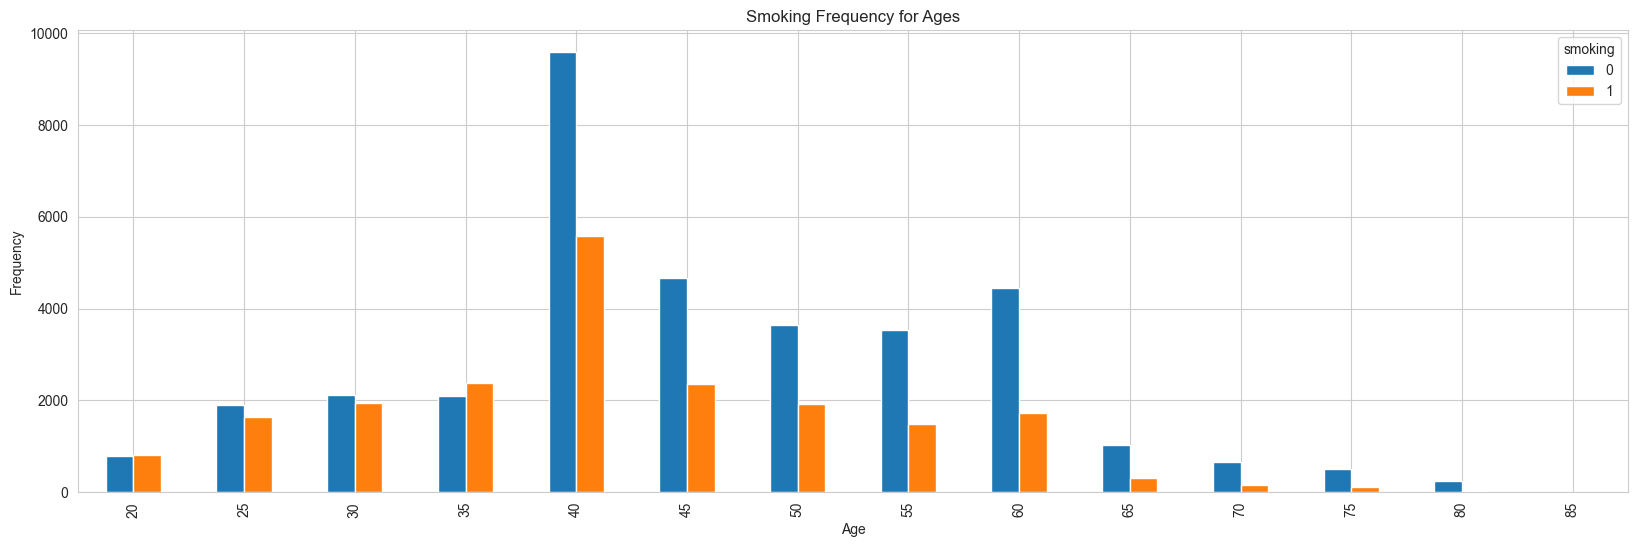

In [93]:
pd.crosstab(df.age,df.smoking).plot(kind="bar", figsize=(20, 6))
plt.title('Smoking Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

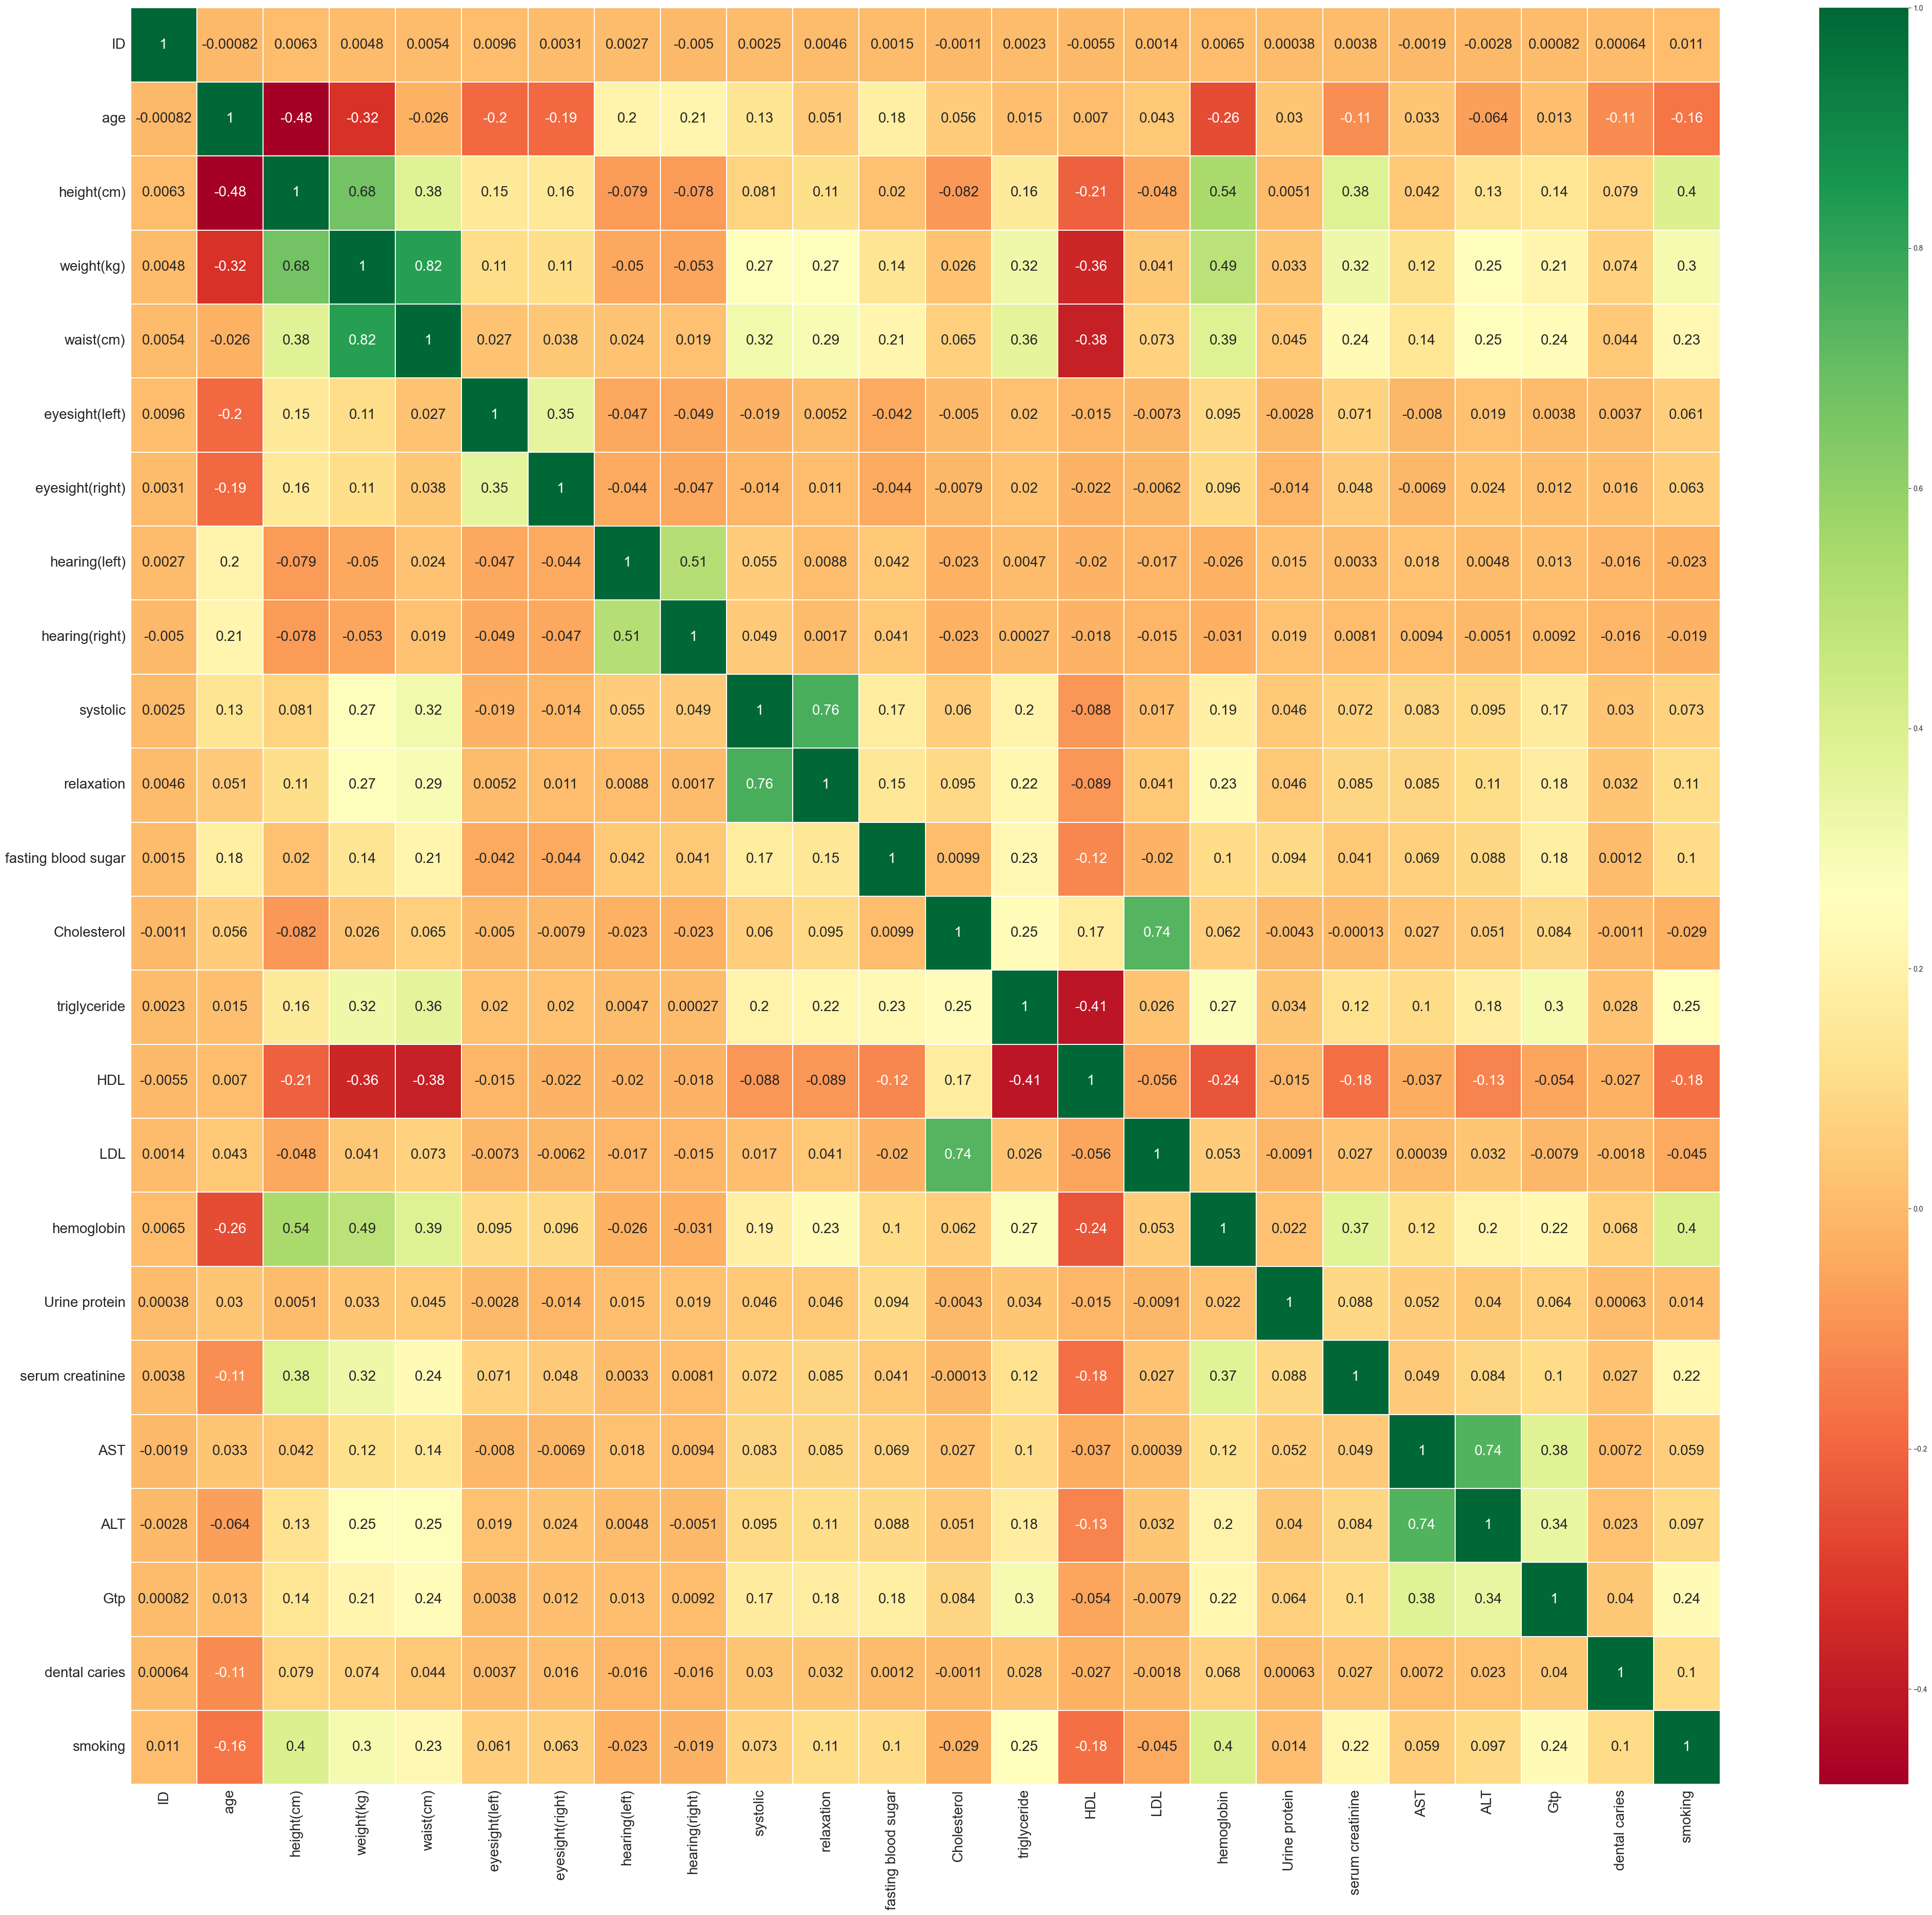

In [94]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(50, 45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<AxesSubplot: xlabel='gender', ylabel='hemoglobin'>

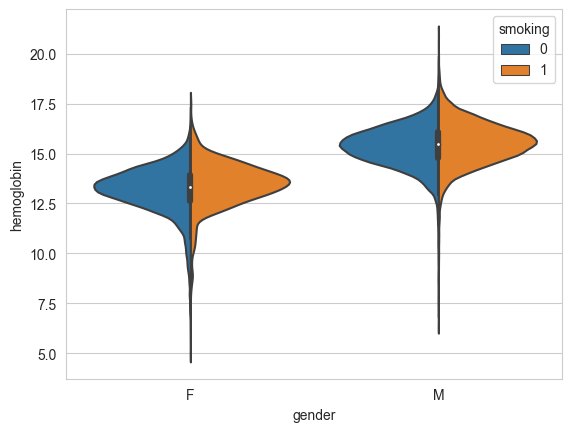

In [95]:
# sns.countplot(data = df, x='hemoglobin')
sns.violinplot(x ="gender", y="hemoglobin", hue="smoking", data=df, split=True)

In [96]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [97]:
df.drop(['ID'], axis=1, inplace=True)

In [98]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [99]:
df['gender'].replace(['F','M'], [0,1], inplace=True)
df['oral'].replace(['N','Y'], [0,1], inplace=True)
df['tartar'].replace(['N','Y'], [0,1], inplace=True)

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar']
X = df[cols]
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# отберём с помощью RFE 5 признаков
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)
# выведем эти 5 признаков
print('Selected features: %s' % list(rfe.get_feature_names_out(cols)))

Selected features: ['gender', 'height(cm)', 'weight(kg)', 'hearing(left)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'tartar']


Optimal number of features: 12
Selected features: ['gender', 'height(cm)', 'weight(kg)', 'systolic', 'relaxation', 'triglyceride', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'tartar']


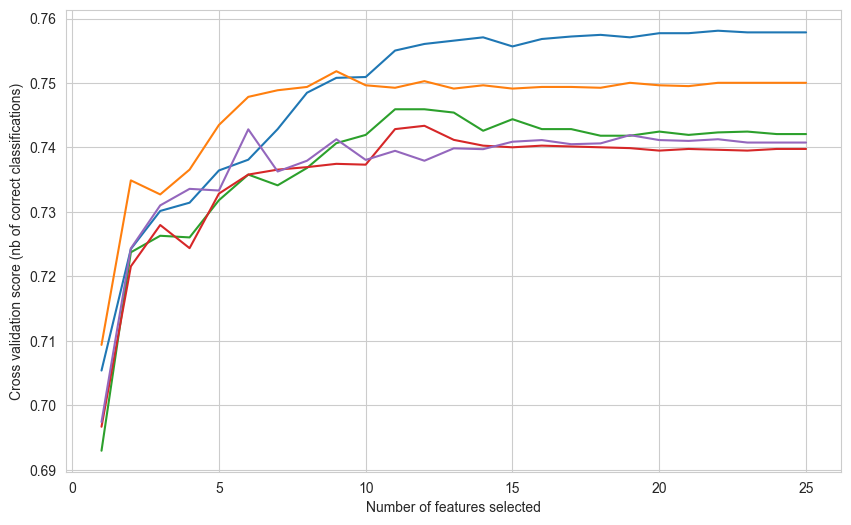

In [102]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

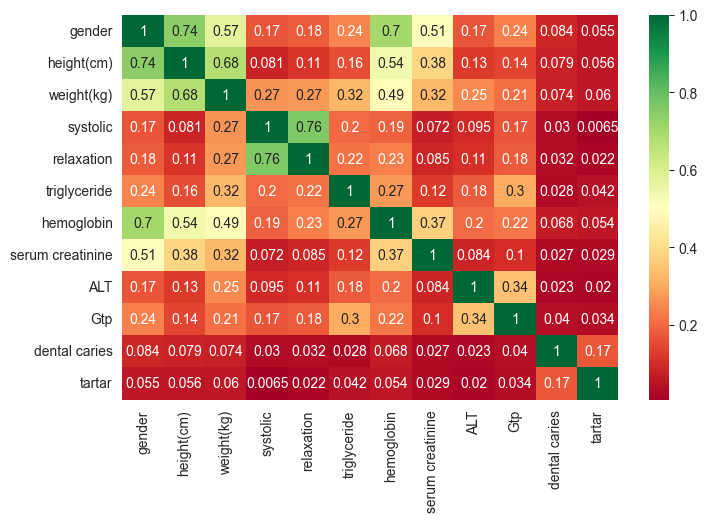

In [103]:
X_logregr = df[selected_features_logregr]

plt.subplots(figsize=(8, 5))
sns.heatmap(X_logregr.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [104]:
X_logregr

,gender,height(cm),weight(kg),systolic,relaxation,triglyceride,hemoglobin,serum creatinine,ALT,Gtp,dental caries,tartar
0,0,155,60,114.0,73.0,82.0,12.9,0.7,19.0,27.0,0,1
1,0,160,60,119.0,70.0,115.0,12.7,0.6,19.0,18.0,0,1
2,1,170,60,138.0,86.0,182.0,15.8,1.0,16.0,22.0,0,0
3,1,165,70,100.0,60.0,254.0,14.7,1.0,26.0,18.0,0,1
4,0,155,60,120.0,74.0,74.0,12.5,0.6,14.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,170,65,110.0,68.0,99.0,12.3,0.6,7.0,10.0,1,1
55688,0,160,50,101.0,62.0,69.0,14.0,0.9,12.0,14.0,0,1
55689,0,160,50,117.0,72.0,77.0,12.4,0.5,11.0,12.0,0,0
55690,1,165,60,133.0,76.0,79.0,14.4,0.7,19.0,18.0,0,0


In [105]:
X_train_scaled_full = X_train_scaled
X_test_scaled_full = X_test_scaled
y_train_full = y_train
y_test_full = y_test

In [108]:
X_test_scaled_full.shape

(16708, 25)

LogReg

In [59]:
# from sklearn.linear_model import LogisticRegression
accuracies = {}

X_train_logregr, X_test_logregr, y_train_logregr, y_test_logregr = train_test_split(X_logregr, y, test_size = 0.3, random_state=42)
scaler_logregr = StandardScaler()
X_train_scaled_logregr = scaler_logregr.fit_transform(X_train_logregr)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled_logregr = scaler_logregr.transform(X_test_logregr)

lr = LogisticRegression()
lr.fit(X_train_scaled_logregr, y_train_logregr)
acc = lr.score(X_test_scaled_logregr, y_test_logregr)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.7450


KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

3 NN Score: 0.7293


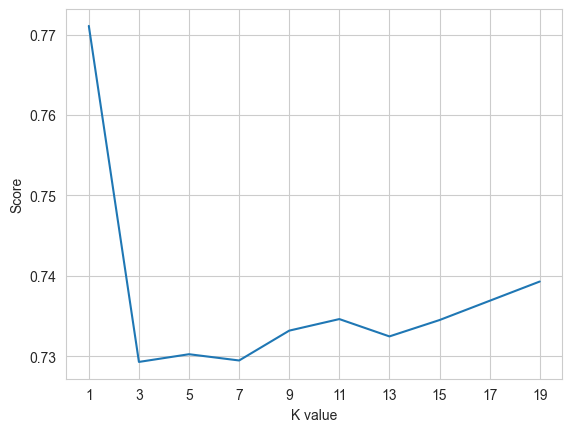

Maximum KNN Score is 0.7711


In [61]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

In [62]:
X_train_scaled.shape

(38984, 25)

SVM

In [63]:
svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.7643


Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.7050


Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.7716


На всех данных алгоритмы отрабатывают долго, уменьшим выборку

In [111]:
df.drop(df.tail(40000).index, inplace = True)

In [112]:
X = df[cols]
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


Custom LogReg

In [68]:
clr = CustomLogisticRegression()
clr.fit(X_train, y_train, epochs=150)
pred = clr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
accuracies['Custom LogReg'] = accuracy

0.6671622769753611


Custom KNN

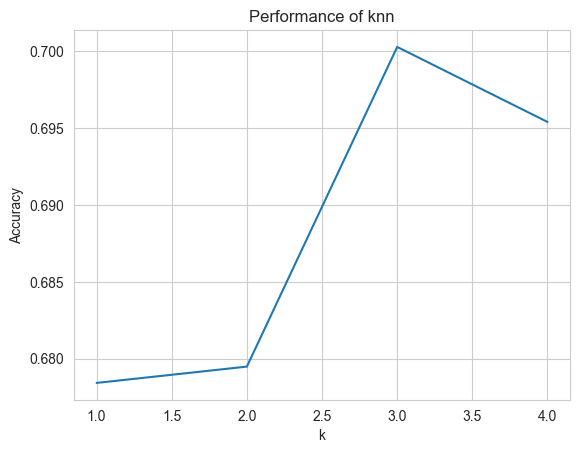

In [69]:
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
acc_knn = []
ks = range(1, 5)
for k in ks:
    cknn = CustomKNeighborsClassifier(k=k)
    cknn.fit(X_train, y_train)
    accuracy = cknn.evaluate(X_test, y_test)
    acc_knn.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, acc_knn)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [70]:
optimal_k=acc_knn.index(max(acc_knn))+1
optimal_k

3

In [71]:
cknn = CustomKNeighborsClassifier(optimal_k)
cknn.fit(X_train, y_train)
accuracy = cknn.evaluate(X_test, y_test)
accuracies['Custom KNN'] = accuracy

Сравнение моделей

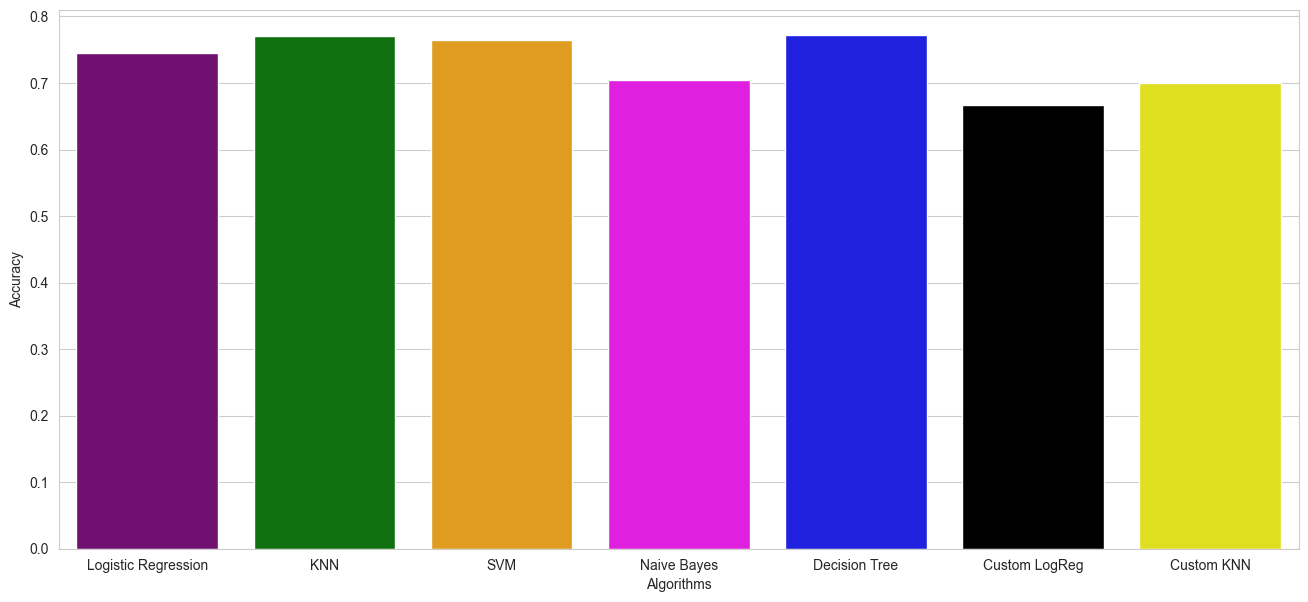

In [72]:
colors = ["purple", "green", "orange", "magenta", "blue", 'black', 'yellow']

sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Confusion matrix

In [73]:
X_train_scaled_full.shape

(38984, 25)

In [117]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled_logregr)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_test_scaled_full, y_test_full)
y_head_knn = knn3.predict(X_test_scaled_full)
y_head_svm = svm.predict(X_test_scaled_full)
y_head_nb = nb.predict(X_test_scaled_full)
y_head_dtc = dtc.predict(X_test)
y_head_customlogreg = clr.predict(X_test)

In [83]:
y_head_knn.shape

(38984,)

In [118]:
cm_lr = confusion_matrix(y_test_logregr, y_head_lr)
cm_knn = confusion_matrix(y_test_full, y_head_knn)
cm_svm = confusion_matrix(y_test_full, y_head_svm)
cm_nb = confusion_matrix(y_test_full, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_clr = confusion_matrix(y_test, y_head_customlogreg)

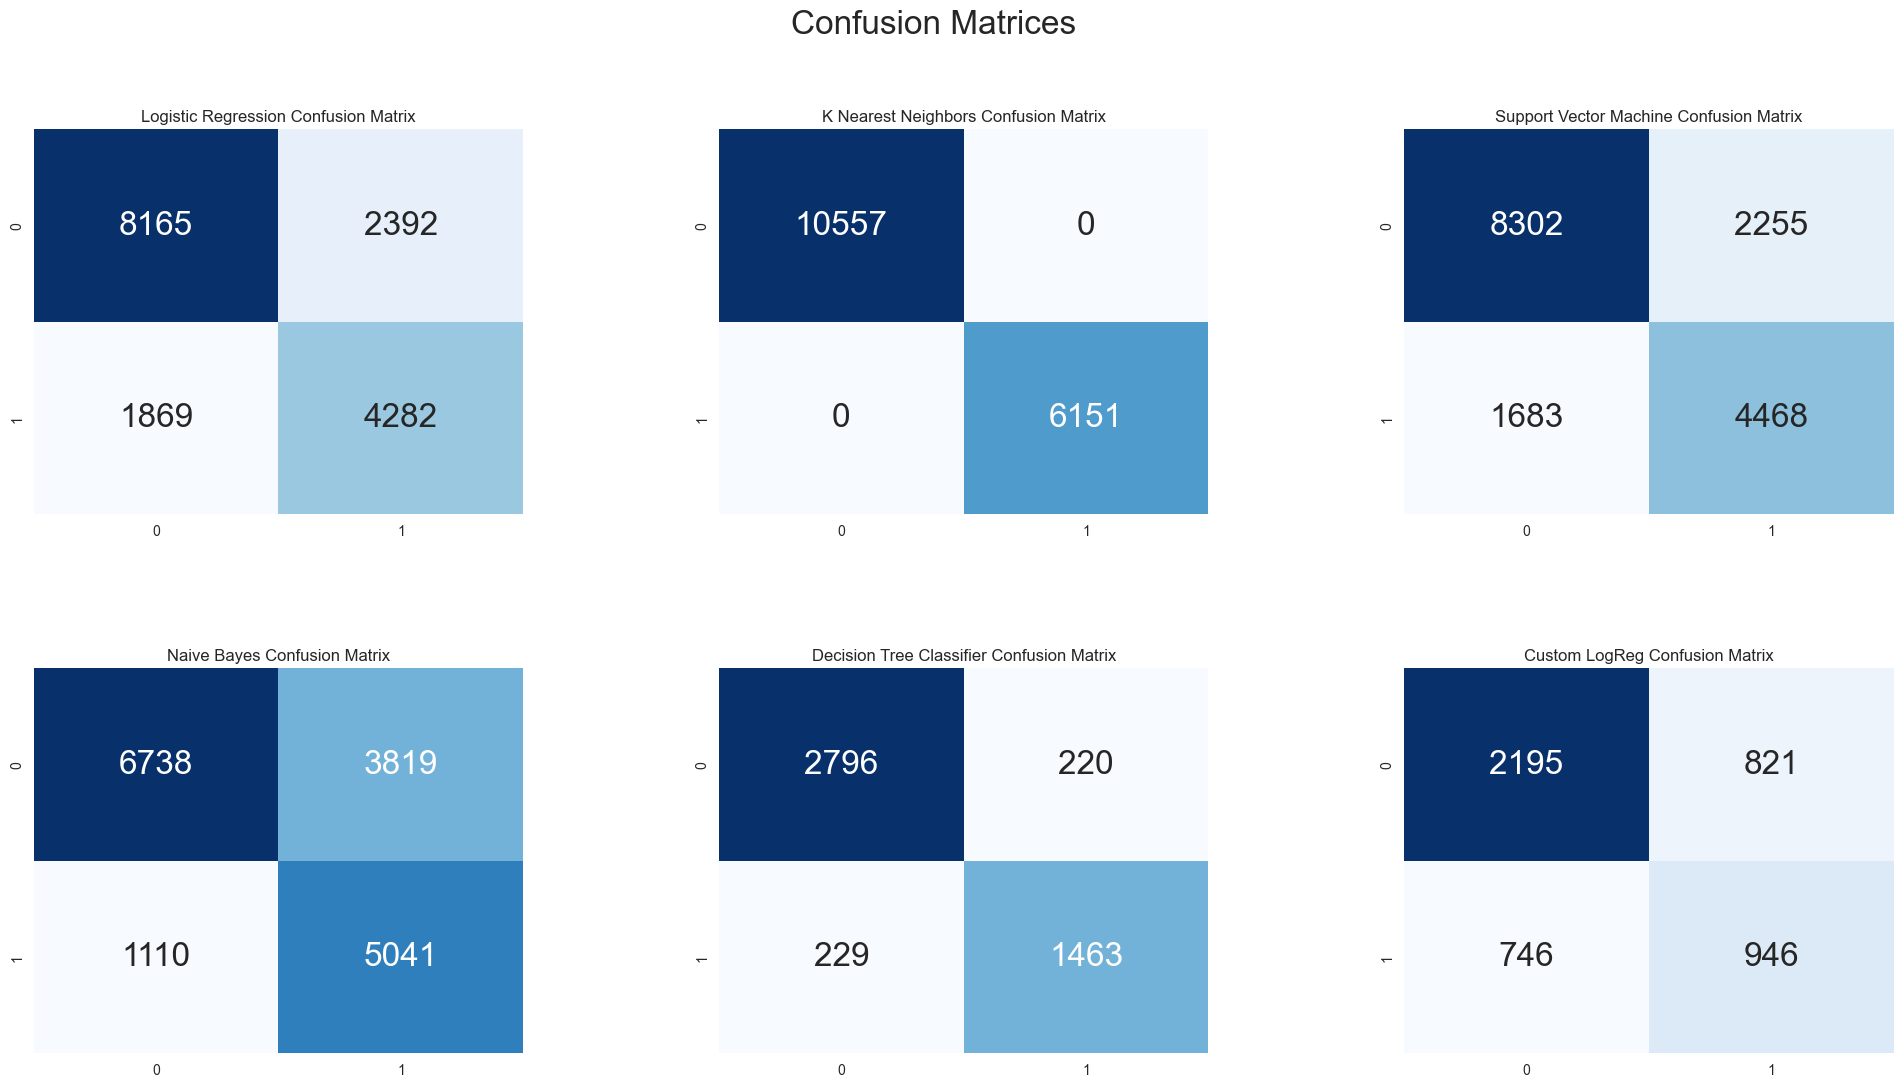

In [121]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Custom LogReg Confusion Matrix")
sns.heatmap(cm_clr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()